In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# !nrnivmodl mod

# Importar dados

In [3]:
import h5py
import numpy as np
import pandas as pd

In [4]:
f = h5py.File('/home/fernando/Documentos/ca1data/sonata/edges/edges.h5', 'r') # 2.4 Gb not in github
f1 = h5py.File('../info/data-bbp/20191017/sonata/nodes/nodes.h5', 'r')
f2 = h5py.File('../info/gdrive/connhipp_mc2r100.h5', 'r')

In [5]:
imc2r100 = list(f2['edges'])

In [6]:
import json

with open("../info/gdrive/proj_mtypes.txt", "r") as fp:
  proj_mtypes = json.load(fp)

with open("../info/gdrive/source_mtypes.txt", "r") as fp:
  source_mtypes = json.load(fp)

with open("../info/gdrive/target_mtypes.txt", "r") as fp:
  target_mtypes = json.load(fp)

In [7]:
mc2r100_projections, syns_per_projection = np.unique(proj_mtypes, return_counts=True)

In [8]:
mc2r100_projections

array(['SO_OLM:SP_AA', 'SO_OLM:SP_CCKBC', 'SO_OLM:SP_Ivy', 'SO_OLM:SP_PC',
       'SO_OLM:SP_PVBC', 'SP_AA:SP_PC', 'SP_BS:SO_OLM', 'SP_BS:SP_AA',
       'SP_BS:SP_CCKBC', 'SP_BS:SP_Ivy', 'SP_BS:SP_PC', 'SP_BS:SP_PVBC',
       'SP_BS:SR_SCA', 'SP_CCKBC:SP_AA', 'SP_CCKBC:SP_BS',
       'SP_CCKBC:SP_CCKBC', 'SP_CCKBC:SP_Ivy', 'SP_CCKBC:SP_PC',
       'SP_CCKBC:SP_PVBC', 'SP_CCKBC:SR_SCA', 'SP_Ivy:SP_AA',
       'SP_Ivy:SP_BS', 'SP_Ivy:SP_CCKBC', 'SP_Ivy:SP_Ivy', 'SP_Ivy:SP_PC',
       'SP_Ivy:SP_PVBC', 'SP_Ivy:SR_SCA', 'SP_PC:SO_OLM', 'SP_PC:SP_AA',
       'SP_PC:SP_BS', 'SP_PC:SP_CCKBC', 'SP_PC:SP_Ivy', 'SP_PC:SP_PC',
       'SP_PC:SP_PVBC', 'SP_PC:SR_SCA', 'SP_PVBC:SO_OLM', 'SP_PVBC:SP_AA',
       'SP_PVBC:SP_BS', 'SP_PVBC:SP_CCKBC', 'SP_PVBC:SP_Ivy',
       'SP_PVBC:SP_PC', 'SP_PVBC:SP_PVBC', 'SP_PVBC:SR_SCA',
       'SR_SCA:SO_OLM', 'SR_SCA:SP_Ivy', 'SR_SCA:SP_PC', 'SR_SCA:SP_PVBC'],
      dtype='<U17')

In [9]:
syns_per_projection

array([    2,    19,     1,  1421,    31,  1014,     2,     3,     7,
          33,  2805,    59,     2,    13,    42,    35,   191, 22336,
         226,     6,    32,    66,    87,   301, 51320,   610,    25,
         960,  1506,   647,  2210,  4484, 17703, 10693,   261,     1,
           8,    35,    43,   135, 12632,   200,     5,     1,     3,
        1125,    11])

In [10]:
with open('../info/gdrive/connhipp_mc2r100.json', "r") as fp:
    parameters = json.load(fp)

In [11]:
parameters['edges'].keys()

dict_keys(['afferent_center_x', 'afferent_center_y', 'afferent_center_z', 'afferent_section_id', 'afferent_section_pos', 'afferent_section_pos_orig', 'afferent_section_type', 'afferent_segment_id', 'afferent_segment_offset', 'conductance', 'decay_time', 'delay', 'depression_time', 'efferent_section_id', 'efferent_section_pos', 'efferent_section_pos_orig', 'efferent_section_type', 'efferent_segment_id', 'efferent_segment_offset', 'efferent_surface_x', 'efferent_surface_y', 'efferent_surface_z', 'facilitation_time', 'n_rrp_vesicles', 'source_node_id', 'spine_length', 'syn_type_id', 'synapse_type_id', 'target_node_id', 'u_syn'])

In [12]:
np.size(parameters['nodes'])

514

In [13]:
projs = np.unique(proj_mtypes)
proj_mtypes = np.array(proj_mtypes)

conductance = []
conductance_std = []

decay_time = []
decay_time_std = []

u_syn = []
u_syn_std = []

depression_time = []
depression_time_std = []

facilitation_time = []
facilitation_time_std = []

delay = []

n_rrp_vesicles = []


for proj in projs:
    conductance.append(np.mean(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
    conductance_std.append(np.std(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
    
    decay_time.append(np.mean(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))
    decay_time_std.append(np.std(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))

    u_syn.append(np.mean(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
    u_syn_std.append(np.std(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
    
    depression_time.append(np.mean(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))
    depression_time_std.append(np.std(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))

    facilitation_time.append(np.mean(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))
    facilitation_time_std.append(np.std(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))

    delay.append(np.mean(np.array(parameters['edges']['delay'])[np.where(proj_mtypes==proj)[0]]))

    n_rrp_vesicles.append(np.mean(np.array(parameters['edges']['n_rrp_vesicles'])[np.where(proj_mtypes==proj)[0]]))

In [14]:
ca1_data = {}

ca1_data['projections'] = projs

ca1_data['conductance'] = conductance
ca1_data['conductance_std'] = conductance_std

ca1_data['decay_time'] = decay_time
ca1_data['decay_time_std'] = decay_time_std

ca1_data['u_syn'] = u_syn
ca1_data['u_syn_std'] = u_syn_std

ca1_data['depression_time'] = depression_time
ca1_data['depression_time_std'] = depression_time_std

ca1_data['facilitation_time'] = facilitation_time
ca1_data['facilitation_time_std'] = facilitation_time_std

ca1_data['delay'] = delay

ca1_data['n_rrp_vesicles'] = n_rrp_vesicles

In [15]:
ca1 = pd.DataFrame(ca1_data)
ca1

projections  conductance  conductance_std  decay_time  \
0        SO_OLM:SP_AA     2.104232         0.000000    3.755018   
1     SO_OLM:SP_CCKBC     2.399427         0.408276    3.538907   
2       SO_OLM:SP_Ivy     1.796479         0.000000    4.111326   
3        SO_OLM:SP_PC     1.301133         0.292598    8.256472   
4      SO_OLM:SP_PVBC     2.006640         0.280588    3.938897   
5         SP_AA:SP_PC     2.359104         0.201813    6.172159   
6        SP_BS:SO_OLM     2.023530         0.000000    3.887870   
7         SP_BS:SP_AA     1.952848         0.000000    4.197608   
8      SP_BS:SP_CCKBC     2.303933         0.120949    3.354564   
9        SP_BS:SP_Ivy     2.052334         0.153531    3.768102   
10        SP_BS:SP_PC     2.815952         0.299850    6.811320   
11      SP_BS:SP_PVBC     2.154554         0.339168    3.932550   
12       SP_BS:SR_SCA     1.844264         0.000000    3.538779   
13     SP_CCKBC:SP_AA     1.925123         0.180390    3.965754   
14     SP_CCKBC:SP_BS     2.300673         0.158946    4.148167   
15  SP_CCKBC:SP_CCKBC     2.208964         0.292672    4.506045   
16    SP_CCKBC:SP_Ivy     2.243402         0.258608    3.865690   
17     SP_CCKBC:SP_PC     1.700118         0.304844    6.498872   
18   SP_CCKBC:SP_PVBC     2.203800         0.341245    4.031680   
19    SP_CCKBC:SR_SCA     2.191457         0.263788    3.932332   
20       SP_Ivy:SP_AA     2.065630         0.332188    4.314990   
21       SP_Ivy:SP_BS     2.281316         0.220570    4.247357   
22    SP_Ivy:SP_CCKBC     2.193896         0.221397    3.995134   
23      SP_Ivy:SP_Ivy     2.179163         0.288411    3.933567   
24       SP_Ivy:SP_PC     0.549456         0.050371    8.314206   
25     SP_Ivy:SP_PVBC     2.199733         0.325721    3.951321   
26      SP_Ivy:SR_SCA     2.318691         0.134636    3.801342   
27       SP_PC:SO_OLM     0.854657         0.105452    1.700438   
28        SP_PC:SP_AA     3.252986         1.304923    4.122154   
29        SP_PC:SP_BS     1.388881         0.107357    4.125149   
30     SP_PC:SP_CCKBC     3.777935         0.290963    4.102762   
31       SP_PC:SP_Ivy     4.995411         0.501568    4.111991   
32        SP_PC:SP_PC     0.601208         0.100228    3.000119   
33      SP_PC:SP_PVBC     2.996417         0.300237    4.126207   
34       SP_PC:SR_SCA     3.324011         1.251667    4.095960   
35     SP_PVBC:SO_OLM     2.502996         0.000000    4.478776   
36      SP_PVBC:SP_AA     2.209156         0.311470    2.726963   
37      SP_PVBC:SP_BS     2.134842         0.165228    3.895288   
38   SP_PVBC:SP_CCKBC     2.108388         0.237500    3.921569   
39     SP_PVBC:SP_Ivy     2.126949         0.269961    4.035240   
40      SP_PVBC:SP_PC     1.748265         0.104310    5.438957   
41    SP_PVBC:SP_PVBC     2.190323         0.300503    2.667300   
42     SP_PVBC:SR_SCA     2.097547         0.264108    3.940409   
43      SR_SCA:SO_OLM     2.133435         0.000000    3.487956   
44      SR_SCA:SP_Ivy     2.220503         0.324630    3.695864   
45       SR_SCA:SP_PC     2.244246         0.305660    8.285501   
46     SR_SCA:SP_PVBC     2.147622         0.042437    4.028284   

    decay_time_std     u_syn  u_syn_std  depression_time  depression_time_std  \
0         0.000000  0.242182   0.000000       970.475769             0.000000   
1         0.302290  0.272408   0.014554       893.913137           166.814924   
2         0.000000  0.296343   0.000000       735.527771             0.000000   
3         1.252592  0.292250   0.042354      1250.358671           478.156400   
4         0.306470  0.271850   0.016311       914.320261           324.381963   
5         0.329252  0.099954   0.005380      1323.949509           688.963228   
6         0.000000  0.293733   0.000000       928.251892             0.000000   
7         0.000000  0.280584   0.000000      1290.307007             0.000000   
8         0.080909  0.264033   0.011101       789.931449        

In [16]:
conductance = {}
for number in range(47):
    conductance[ca1['projections'][number]] = ca1['conductance'][number]

In [17]:
# ca1.to_excel('../info/gdrive/ca1.xlsx')

In [18]:
syndata_exc = pd.read_csv('../info/gdrive/syndata_exc.csv')
syndata_exc

connType  tau_r_AMPA  tau_d_AMPA  std_tau_d_AMPA  tau_r_NMDA  \
0      SP_PC:SP_BS        0.50        4.12             NaN         NaN   
1   SP_PC:SP_CCKBC        0.50        4.12             NaN         NaN   
2     SP_PC:SP_Ivy        0.50        4.12             NaN         NaN   
3    SP_PC:SP_PVBC        0.50        4.12             NaN         NaN   
4     SP_PC:SO_Tri         NaN         NaN             NaN         NaN   
5    SP_PC:SLM_PPA         NaN         NaN             NaN         NaN   
6      SP_PC:SO_BP         NaN         NaN             NaN         NaN   
7     SP_PC:SR_SCA         NaN         NaN             NaN         NaN   
8      SP_PC:SP_AA         NaN         NaN             NaN         NaN   
9      SP_PC:SP_PC        0.02        3.00             NaN         NaN   
10     SP_PC:SO_BS        0.50        4.12             NaN         NaN   
11    SP_PC:SO_OLM        0.14        1.70             NaN         NaN   

    tau_d_NMDA  std_tau_d_NMDA   Use  Use_std    Dep  Dep_std    Fac  Fac_std  \
0       148.50            0.09  0.23     0.09  410.0     11.0   10.0     0.10   
1       298.75            0.09  0.23     0.09  410.0     11.0   10.0     0.40   
2          NaN             NaN   NaN     0.02  617.0      5.0   17.0     0.40   
3          NaN             NaN   NaN     0.09  410.0     11.0   10.0     0.05   
4          NaN             NaN   NaN      NaN    NaN      NaN    NaN      NaN   
5          NaN             NaN   NaN      NaN    NaN      NaN    NaN      NaN   
6          NaN             NaN   NaN      NaN    NaN      NaN    NaN      NaN   
7          NaN             NaN   NaN      NaN    NaN      NaN    NaN      NaN   
8          NaN             NaN   NaN      NaN    NaN      NaN    NaN      NaN   
9       148.50            0.02  0.50     0.02  671.0      5.0   17.0     0.10   
10      148.50            0.09  0.23     0.09  410.0     11.0   10.0     0.10   
11      148.50            0.02  0.09     0.12  138.0    830.0  670.0     0.05   

    gmax  NMDA_ratio  
0   1.65        0.28  
1   3.50        0.86  
2   2.30         NaN  
3   2.00         NaN  
4    NaN         NaN  
5    NaN         NaN  
6    NaN         NaN  
7    NaN         NaN  
8    NaN         NaN  
9   0.60        1.22  
10  1.65        0.28  
11  0.80        0.28

In [19]:
NMDA_ratio = {}
for number in range(12):
    if syndata_exc['connType'][number] in mc2r100_projections:

        if float(syndata_exc['NMDA_ratio'][number]) > 0:
            print(syndata_exc['connType'][number],float(syndata_exc['NMDA_ratio'][number]))
            NMDA_ratio[syndata_exc['connType'][number]] = syndata_exc['NMDA_ratio'][number]
        else:
            print(syndata_exc['connType'][number], 0.28)
            NMDA_ratio[syndata_exc['connType'][number]] = 0.28

SP_PC:SP_BS 0.28
SP_PC:SP_CCKBC 0.86
SP_PC:SP_Ivy 0.28
SP_PC:SP_PVBC 0.28
SP_PC:SR_SCA 0.28
SP_PC:SP_AA 0.28
SP_PC:SP_PC 1.22
SP_PC:SO_OLM 0.28


In [20]:
from netpyne import specs

cfg = specs.SimConfig()		

#------------------------------------------------------------------------------
# Options
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 500.0			            # Duration of the simulation, in ms
cfg.dt = 0.05								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.01 
cfg.printRunTime = 0.1 # in sec			

cfg.seeds = {'conn': 1333, 'stim': 1333, 'loc': 1333} 
cfg.hParams = {'celsius': 34, 'v_init': -65}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'
cfg.saveFolder = '../data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = True	           	## Save json file
cfg.saveDataInclude = ['simData'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			
cfg.saveCellConns = True	

#------------------------------------------------------------------------------
# ploting
#------------------------------------------------------------------------------
cfg.analysis['plotTraces'] = {'include': [n for n in range(12)], 'timeRange': [0,cfg.duration], 'ylim': [-90,40], 'saveFig': True, 'showFig': True, 'figSize':(12,4)} # Plot recorded traces for this list of cells
cfg.analysis['plotShape'] = {'includePre': [n for n in range(12)],'includePost': [n for n in range(12)], 'includeAxon': False, 'saveFig': True, 'showFig': True, 'figSize':(22,22)}
cfg.analysis['plot2Dnet'] = {'view':'xy','saveFig': '../data/'+cfg.simLabel[0:9]+'/'+cfg.simLabel +'_xy_.png', 'showFig': True, 'figSize':(16,16), 'fontSize': 10}

In [21]:
from netpyne import sim # specs
# from neuron import gui
import matplotlib.pyplot as plt
import numpy as np

from loadinfosfromBBP import *

netParams = specs.NetParams()

# try:
#     from __main__ import cfg  # import SimConfig object with params from parent module
# except:
#     from cfg import cfg
#------------------------------------------------------------------------------
# POPULATION PARAMETERS	
#------------------------------------------------------------------------------
# layer_heights = (0, 170, 230, 510, 660)
# layers = ('SO', 'SP', 'SR', 'SLM')
layer = {'SO':[0.0, 0.258], 'SP':[0.258, 0.348], 'SR':[0.348, 0.773], 'SLM':[0.773, 1.0], 'CA3':[2.0,3.0], 'EC':[3.0, 4.0]}  # normalized layer boundaries

# full import
scalepopNum = 0.002

# mc2 import
netParams.shape = 'cylinder' # cylindrical (column-like) volume
area = (3*np.sqrt(3)*240**2)/2 # six triag l = 240, h =  240*np.sqrt(3)/2
diam = 2*np.sqrt(area/np.pi) #equiv circle
netParams.sizeX=diam
netParams.sizeZ=diam
netParams.sizeY=660

#------------------------------------------------------------------------------
Ca1_cellNumber = 0
for mtype in Mtypelist:    
    popNumber[mtype] = int(np.ceil(popNumber[mtype]*scalepopNum))
    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]

print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
print (popNumber)

#------------------------------------------------------------------------------
# to debug
popNumber['SP_PC'] = int(1)
Ca1_cellNumber = 0
for mtype in Mtypelist:    
    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]

print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
print (popNumber)

scalepopNum = 0.002   Ca1_cellNumber = 45
{'SLM_PPA': 1, 'SP_Ivy': 1, 'SR_SCA': 1, 'SO_OLM': 1, 'SO_BP': 1, 'SP_PVBC': 1, 'SP_BS': 1, 'SP_AA': 1, 'SO_BS': 1, 'SO_Tri': 1, 'SP_PC': 34, 'SP_CCKBC': 1}
scalepopNum = 0.002   Ca1_cellNumber = 12
{'SLM_PPA': 1, 'SP_Ivy': 1, 'SR_SCA': 1, 'SO_OLM': 1, 'SO_BP': 1, 'SP_PVBC': 1, 'SP_BS': 1, 'SP_AA': 1, 'SO_BS': 1, 'SO_Tri': 1, 'SP_PC': 1, 'SP_CCKBC': 1}


In [22]:
#------------------------------------------------------------------------------
# IMPORT CELL PARAMETERS
#------------------------------------------------------------------------------
popLabel = {}
cellParamLabels = []
cellNumber = {}
# gid_list = [18097, 18109, 18140, 18149, 18163, 18177,18189, 18191, 16950, 16963, 17199, 17202, 
# 						17411, 17416, 17486, 17497, 13513, 14311, 17946, 17958, 22, 25, 1, 3]
# gid_list = gid_list - np.ones_like(gid_list) # start from 1 in original list

gid_list_mc2 = load_gid_list_mc2_Column()

gid_list_mc2 = [24, 25, 67, 110, 112, 156, 247, 278, 359, 414, 451, 474, 523, 556, 561, 593, 714, 717, 751, 769, 800, 810, 883, 991, 1001, 1084, 1112, 1124, 1176, 1177, 1197, 1248, 1255, 1335, 1381, 1410, 1492, 1493, 1497, 1557, 
1596, 1674, 1783, 1819, 1866, 1942, 1987, 2001, 2011, 2045, 2073, 2099, 2115, 2118, 2120, 2210, 2245, 2266, 2316, 2342, 2408, 2440, 2561, 2575, 2576, 2611, 2651, 2673, 2697, 2712, 2751, 2761, 2779, 2810, 2826, 2871, 
2872, 2893, 2997, 3095, 3108, 3139, 3154, 3241, 3330, 3434, 3454, 3519, 3539, 3600, 3608, 3612, 3648, 3674, 3694, 3698, 3703, 3782, 3840, 3865, 3867, 3938, 4084, 4091, 4097, 4108, 4116, 4118, 4127, 4156, 4206, 4228, 
4266, 4295, 4298, 4322, 4338, 4353, 4389, 4431, 4440, 4447, 4466, 4475, 4553, 4559, 4591, 4617, 4688, 4796, 4842, 4853, 4914, 4915, 4934, 4941, 4945, 4960, 4977, 5044, 5112, 5181, 5208, 5271, 5276, 5280, 5285, 5488, 
5524, 5531, 5540, 5589, 5592, 5596, 5653, 5670, 5677, 5731, 5775, 5855, 5975, 6092, 6158, 6165, 6242, 6276, 6392, 6473, 6476, 6488, 6505, 6531, 6536, 6588, 6626, 6632, 6689, 6707, 6712, 6721, 6754, 6783, 6788, 6959, 
6964, 7000, 7024, 7053, 7076, 7081, 7143, 7163, 7221, 7226, 7235, 7266, 7269, 7338, 7342, 7385, 7400, 7427, 7510, 7547, 7604, 7624, 7645, 7669, 7673, 7738, 7832, 7888, 7893, 7912, 7993, 8082, 8085, 8110, 8132, 8154, 
8330, 8335, 8351, 8414, 8465, 8503, 8531, 8559, 8662, 8740, 8758, 8786, 8795, 8813, 8833, 8852, 8918, 8950, 8957, 8963, 9039, 9059, 9082, 9091, 9101, 9116, 9175, 9188, 9212, 9255, 9285, 9380, 9396, 9411, 9477, 9488, 
9493, 9502, 9532, 9543, 9630, 9654, 9665, 9685, 9703, 9716, 9774, 9803, 9814, 9842, 9879, 9886, 10016, 10024, 10093, 10102, 10110, 10119, 10195, 10242, 10355, 10356, 10357, 10400, 10414, 10505, 10556, 10577, 10592, 
10682, 10774, 10824, 10827, 10849, 10855, 10881, 10889, 10919, 10965, 10997, 11005, 11015, 11017, 11024, 11117, 11137, 11196, 11197, 11243, 11244, 11282, 11286, 11401, 11404, 11416, 11470, 11474, 11480, 11494, 
11497, 11522, 11532, 11540, 11589, 11609, 11616, 11622, 11734, 11793, 11844, 11864, 11875, 11958, 11982, 11998, 12000, 12018, 12053, 12195, 12204, 12216, 12244, 12424, 12465, 12553, 12578, 12667, 12671, 12685, 12762, 12767, 
12835, 12838, 12933, 12935, 12941, 12943, 12963, 13017, 13069, 13161, 13183, 13185, 13203, 13284, 13296, 13324, 13329, 13352, 13441, 13512, 13517, 13524, 13564, 13611, 13634, 13650, 13658, 13689, 13728, 13824, 13860, 13957, 13965, 
13970, 13990, 14020, 14094, 14134, 14161, 14232, 14243, 14262, 14275, 14310, 14322, 14379, 14488, 14532, 14545, 14589, 14590, 14641, 14675, 14691, 14718, 14738, 14751, 14764, 14773, 14827, 14887, 14895, 14908, 14912, 15000, 15005, 15010, 
15028, 15050, 15059, 15060, 15067, 15081, 15094, 15121, 15151, 15169, 15178, 15220, 15224, 15264, 15272, 15275, 15332, 15376, 15404, 15426, 15432, 15437, 15475, 15501, 15544, 15578, 15609, 15616, 15627, 15630, 15676, 15733, 15757, 15854, 
15878, 15955, 15956, 15963, 16027, 16032, 16033, 16160, 16180, 16220, 16245, 16255, 16426, 16499, 16505, 16541, 16562, 16640, 16658, 16690, 16716, 16753, 16787, 16791, 16831, 16895, 16926, 16962, 16967, 17035, 17040, 17074, 17089, 17092, 
17093, 17116, 17137, 17170, 17178, 17198, 17211, 17222, 17246, 17305, 17339, 17384, 17422, 17514, 17516, 17562, 17614, 17631, 17676, 17686, 17816, 17820, 17844, 17870, 17991, 18018, 18060, 18108]

In [23]:
cellmtype = []
for mtype in Mtypelist:

	gid_list = load_gid_list(mtype)

	gid_mtype = []
	for gid in gid_list:
		if gid in gid_list_mc2 and np.size(gid_mtype)<popNumber[mtype]:
			gid_mtype.append(gid) # start from 0 in h5
			# gid_mtype.append(gid-1) # start from 1 in original list


	for gid in gid_mtype:
		MorphoName = nodesinfo['morphology'][gid] + '.swc'
		hocName = nodesinfo['model_template'][gid][4:]  
		cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_0'
		cellmtype.append(nodesinfo['mtype'][gid])

		if cellName in cellParamLabels:
			cellNumber[cellName[:-2]] = cellNumber[cellName[:-2]] + 1
			cellName = cellName[:-2] + '_' + str(cellNumber[cellName[:-2]]-1) # [cell_0,cell_1] cellNumber = 2
		else:
			cellNumber[cellName[:-2]] = 1

		cellParamLabels.append(cellName)
		popLabel[cellName] = nodesinfo['mtype'][gid]

		print('%s  gid = %d hoc = %s swc = %s cellmtype = %s' % (cellName,gid,hocName,MorphoName, cellmtype))

		cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
			conds={'cellType': cellName, 'cellModel': 'HH_full'},
			fileName='cellwrapper.py',
			cellName='loadCell',
			cellInstance = True,
			cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
		netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')

  # 'SLM_PPA': # No SLM in mc2, import from mc3 (mc5 or mc6 are avaliable too) -> gid = 0  
  # 'SO_BP': # No SO_BP in mc2, import from mc3 (mcX are avaliable too) -> gid = 18193  
  # 'SO_Tri': # No SO_Tri in mc2(r=100), import from mc2 (r>100) gid = 18152
  # 'SO_BS': # No SO_BS in mc2(r=100, import from mc2 (r>100) -> gid = 18139
for gid in [0, 18193, 18152, 18139]:
  MorphoName = nodesinfo['morphology'][gid] + '.swc'
  hocName = nodesinfo['model_template'][gid][4:]  
  cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_0'
  cellmtype.append(nodesinfo['mtype'][gid])
  cellNumber[cellName[:-2]] = 1

  cellParamLabels.append(cellName)
  popLabel[cellName] = nodesinfo['mtype'][gid]

  print('%s  gid = %d hoc = %s swc = %s mtype = %s' % (cellName,gid,hocName,MorphoName, cellmtype))

  cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
    conds={'cellType': cellName, 'cellModel': 'HH_full'},
    fileName='cellwrapper.py',
    cellName='loadCell',
    cellInstance = True,
    cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
  netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')

SP_Ivy_cNAC_mc2_0  gid = 17562 hoc = CA1_int_cNAC_980513B_2019032915552 swc = 970717D_-_Scale_x1.000_y1.050_z1.000_-_Clone_1.swc cellmtype = ['SP_Ivy']
SR_SCA_cAC_mc2_0  gid = 24 hoc = CA1_int_cAC_990611HP2_2019032816214 swc = 990611HP2_-_Scale_x1.000_y0.900_z1.000.swc cellmtype = ['SP_Ivy', 'SR_SCA']
SO_OLM_cAC_mc2_0  gid = 18060 hoc = CA1_int_cAC_011017HP2_2019032814552 swc = 011017HP2_height_195.swc cellmtype = ['SP_Ivy', 'SR_SCA', 'SO_OLM']
SP_PVBC_bAC_mc2_0  gid = 16926 hoc = CA1_int_bAC_011023HP2_2019032911555 swc = 060314AM2_-_Scale_x1.000_y1.050_z1.000_-_Clone_0.swc cellmtype = ['SP_Ivy', 'SR_SCA', 'SO_OLM', 'SP_PVBC']
SP_BS_cNAC_mc2_0  gid = 17422 hoc = CA1_int_cNAC_011017HP2_2019032816461 swc = 980513B_-_Scale_x1.000_y0.850_z1.000.swc cellmtype = ['SP_Ivy', 'SR_SCA', 'SO_OLM', 'SP_PVBC', 'SP_BS']
SP_AA_bAC_mc2_0  gid = 17514 hoc = CA1_int_bAC_011017HP2_2019032911530 swc = 970911C_-_Scale_x1.000_y0.950_z1.000_-_Clone_2.swc cellmtype = ['SP_Ivy', 'SR_SCA', 'SO_OLM', 'SP_PVBC', 

In [24]:
#------------------------------------------------------------------------------
#Amount of cells in the network
#------------------------------------------------------------------------------
for cellName in cellParamLabels:
	celllayer = cellName.split('_')[0]
	netParams.popParams[cellName] = {'cellType': cellName, 'numCells': 1, 'ynormRange': layer[celllayer], 'cellModel': 'HH_full'}

    
spkTimes = [250,300,350,400,450,500,2750,2800,2850,2900,3400]
netParams.popParams['presyn'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times    

In [26]:
#------------------------------------------------------------------------------
# DESCRIPTION OF SYNAPTIC MECHANISMS
#------------------------------------------------------------------------------
Epops = pd.unique(nodesinfo[nodesinfo['synapse_class'] == 'EXC']['mtype'])
Ipops = pd.unique(nodesinfo[nodesinfo['synapse_class'] == 'INH']['mtype'])

for pre in Epops:
    for post in Mtypelist:
        proj = '%s:%s' % (pre, post)

        if proj in mc2r100_projections:

            syndata_proj = ca1[ca1['projections']==proj]


            netParams.synMechParams[proj] = {'mod': 'DetAMPANMDA',
                                          'NMDA_ratio': NMDA_ratio[proj], 
                                          'tau_d_AMPA': float(syndata_proj['decay_time']), 
                                          'Use': float(syndata_proj['u_syn']), 
                                          'Dep': float(syndata_proj['depression_time']), 
                                          'Fac': float(syndata_proj['facilitation_time'])
                                          }
for pre in Ipops:
    for post in Mtypelist:
        proj = '%s:%s' % (pre, post)

        if proj in mc2r100_projections:

            syndata_proj = ca1[ca1['projections']==proj]


            netParams.synMechParams[proj] = {'mod': 'DetGABAAB',
                                          'tau_d_GABAA': float(syndata_proj['decay_time']),
                                          'Use': float(syndata_proj['u_syn']), 
                                          'Dep': float(syndata_proj['depression_time']), 
                                          'Fac': float(syndata_proj['facilitation_time'])
                                          }

#------------------------------------------------------------------------------
#	NETWORK CONNECTIONS	
#------------------------------------------------------------------------------
number = 0
for cellpre in ['SP_PC_cACpyr_mc2_1']:
    for cellpost in cellParamLabels:
        pre = cellpre.split('_')[0] + '_' + cellpre.split('_')[1]
        post = cellpost.split('_')[0] + '_' + cellpost.split('_')[1]
        proj = '%s:%s' % (pre, post)

        if proj in mc2r100_projections:
            number+=1
            print(number,pre, post)
            
            netParams.connParams['EE_' + proj] = { 
                    'preConds': {'pop': 'presyn'},
                    'postConds': {'pop': cellpost},
                    'sec': 'spinyEE',                  # target postsyn section
                    'synMech': proj,              # target synaptic mechanism
                    'weight': conductance[proj],                 # synaptic weight 
                    'synsPerConn': 3,
                    'delay': 0.1}      





#------------------------------------------------------------------------------
#	NETWORK CONNECTIONS	
#------------------------------------------------------------------------------
#for pre in cellParamLabels:
#	for post in cellParamLabels:
#		synMech = '%s:%s' % (popLabel[pre], popLabel[post])
#
#		if synMech in mc2r100_projections:
#
#			netParams.connParams[pre + '->' + post] = {
#				'preConds': {'pop': pre},
#				'postConds': {'pop': post},
#				# 'sec': postsynDict[postsynList[i]],
#				'synsPerConn': 10,
#				'synMech': synMech,
#				'weight': 1.0,
#				'delay': float(ca1['delay'][ca1['projections']==synMech])
#				}
#
#------------------------------------------------------------------------------
# Stimulus
#------------------------------------------------------------------------------
# durationstim = 300.0
# delaystim = 0.0
# timesimulation = 500.0
# ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
# step_number = 5
# netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}
# netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':cellParamLabels}}

#durationstim = 20.0
#delaystim = 2.0
#timesimulation = 10.0
##ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
##ampstim =  [0.8, 0.6, 0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
#
##step_number = 4
##netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}
#netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': 'uniform(0.5, 1.0)'}
#netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':cellParamLabels}}



1 SP_PC SP_Ivy
2 SP_PC SR_SCA
3 SP_PC SO_OLM
4 SP_PC SP_PVBC
5 SP_PC SP_BS
6 SP_PC SP_AA
7 SP_PC SP_PC
8 SP_PC SP_CCKBC


In [27]:
netParams.popParams.keys()

odict_keys(['SP_Ivy_cNAC_mc2_0', 'SR_SCA_cAC_mc2_0', 'SO_OLM_cAC_mc2_0', 'SP_PVBC_bAC_mc2_0', 'SP_BS_cNAC_mc2_0', 'SP_AA_bAC_mc2_0', 'SP_PC_cACpyr_mc2_0', 'SP_CCKBC_cAC_mc2_0', 'SLM_PPA_bAC_mc5_0', 'SO_BP_cNAC_mc3_0', 'SO_Tri_cAC_mc2_0', 'SO_BS_cNAC_mc2_0', 'presyn'])

In [28]:
netParams.connParams

{EE_SP_PC:SP_Ivy: {'preConds': {'pop': 'presyn'}, 'postConds': {'pop': 'SP_Ivy_cNAC_mc2_0'}, 'sec': 'spinyEE', 'synMech': 'SP_PC:SP_Ivy', 'weight': 4.995411225401004, 'synsPerConn': 3, 'delay': 0.1}, EE_SP_PC:SR_SCA: {'preConds': {'pop': 'presyn'}, 'postConds': {'pop': 'SR_SCA_cAC_mc2_0'}, 'sec': 'spinyEE', 'synMech': 'SP_PC:SR_SCA', 'weight': 3.324010648489912, 'synsPerConn': 3, 'delay': 0.1}, EE_SP_PC:SO_OLM: {'preConds': {'pop': 'presyn'}, 'postConds': {'pop': 'SO_OLM_cAC_mc2_0'}, 'sec': 'spinyEE', 'synMech': 'SP_PC:SO_OLM', 'weight': 0.854656838439405, 'synsPerConn': 3, 'delay': 0.1}, EE_SP_PC:SP_PVBC: {'preConds': {'pop': 'presyn'}, 'postConds': {'pop': 'SP_PVBC_bAC_mc2_0'}, 'sec': 'spinyEE', 'synMech': 'SP_PC:SP_PVBC', 'weight': 2.996417381225439, 'synsPerConn': 3, 'delay': 0.1}, EE_SP_PC:SP_BS: {'preConds': {'pop': 'presyn'}, 'postConds': {'pop': 'SP_BS_cNAC_mc2_0'}, 'sec': 'spinyEE', 'synMech': 'SP_PC:SP_BS', 'weight': 1.3888808934729102, 'synsPerConn': 3, 'delay': 0.1}, EE_SP_

In [ ]:
#from netpyne import sim # specs
## from neuron import gui
#import matplotlib.pyplot as plt
#import numpy as np
#
#from loadinfosfromBBP import *
#
#netParams = specs.NetParams()
#
## try:
##     from __main__ import cfg  # import SimConfig object with params from parent module
## except:
##     from cfg import cfg
##------------------------------------------------------------------------------
## POPULATION PARAMETERS	
##------------------------------------------------------------------------------
## layer_heights = (0, 170, 230, 510, 660)
## layers = ('SO', 'SP', 'SR', 'SLM')
#layer = {'SO':[0.0, 0.258], 'SP':[0.258, 0.348], 'SR':[0.348, 0.773], 'SLM':[0.773, 1.0], 'CA3':[2.0,3.0], 'EC':[3.0, 4.0]}  # normalized layer boundaries
#
## full import
#scalepopNum = 0.002
#
## mc2 import
#netParams.shape = 'cylinder' # cylindrical (column-like) volume
#area = (3*np.sqrt(3)*240**2)/2 # six triag l = 240, h =  240*np.sqrt(3)/2
#diam = 2*np.sqrt(area/np.pi) #equiv circle
#netParams.sizeX=diam
#netParams.sizeZ=diam
#netParams.sizeY=660
#
##------------------------------------------------------------------------------
#Ca1_cellNumber = 0
#for mtype in Mtypelist:    
#    popNumber[mtype] = int(np.ceil(popNumber[mtype]*scalepopNum))
#    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]
#
#print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
#print (popNumber)
#
##------------------------------------------------------------------------------
## to debug
#popNumber['SP_PC'] = int(1)
#Ca1_cellNumber = 0
#for mtype in Mtypelist:    
#    Ca1_cellNumber = Ca1_cellNumber + popNumber[mtype]

#print('scalepopNum =',scalepopNum,'  Ca1_cellNumber =',Ca1_cellNumber)
#print (popNumber)
#
##------------------------------------------------------------------------------
## IMPORT CELL PARAMETERS
##------------------------------------------------------------------------------
#popLabel = {}
#cellParamLabels = []
#cellNumber = {}
## gid_list = [18097, 18109, 18140, 18149, 18163, 18177,18189, 18191, 16950, 16963, 17199, 17202, 
## 						17411, 17416, 17486, 17497, 13513, 14311, 17946, 17958, 22, 25, 1, 3]
## gid_list = gid_list - np.ones_like(gid_list) # start from 1 in original list
#
#gid_list_mc2 = load_gid_list_mc2_Column()
#
#gid_list_mc2 = [24, 25, 67, 110, 112, 156, 247, 278, 359, 414, 451, 474, 523, 556, 561, 593, 714, 717, 751, 769, 800, 810, 883, 991, 1001, 1084, 1112, 1124, 1176, 1177, 1197, 1248, 1255, 1335, 1381, 1410, 1492, 1493, 1497, 1557, 1596, 1674, 1783, 1819, 1866, 1942, 1987, 2001, 2011, 2045, 2073, 2099, 2115, 2118, 2120, 2210, 2245, 2266, 2316, 2342, 2408, 2440, 2561, 2575, 2576, 2611, 2651, 2673, 2697, 2712, 2751, 2761, 2779, 2810, 2826, 2871, 2872, 2893, 2997, 3095, 3108, 3139, 3154, 3241, 3330, 3434, 3454, 3519, 3539, 3600, 3608, 3612, 3648, 3674, 3694, 3698, 3703, 3782, 3840, 3865, 3867, 3938, 4084, 4091, 4097, 4108, 4116, 4118, 4127, 4156, 4206, 4228, 4266, 4295, 4298, 4322, 4338, 4353, 4389, 4431, 4440, 4447, 4466, 4475, 4553, 4559, 4591, 4617, 4688, 4796, 4842, 4853, 4914, 4915, 4934, 4941, 4945, 4960, 4977, 5044, 5112, 5181, 5208, 5271, 5276, 5280, 5285, 5488, 5524, 5531, 5540, 5589, 5592, 5596, 5653, 5670, 5677, 5731, 5775, 5855, 5975, 6092, 6158, 6165, 6242, 6276, 6392, 6473, 6476, 6488, 6505, 6531, 6536, 6588, 6626, 6632, 6689, 6707, 6712, 6721, 6754, 6783, 6788, 6959, 6964, 7000, 7024, 7053, 7076, 7081, 7143, 7163, 7221, 7226, 7235, 7266, 7269, 7338, 7342, 7385, 7400, 7427, 7510, 7547, 7604, 7624, 7645, 7669, 7673, 7738, 7832, 7888, 7893, 7912, 7993, 8082, 8085, 8110, 8132, 8154, 8330, 8335, 8351, 8414, 8465, 8503, 8531, 8559, 8662, 8740, 8758, 8786, 8795, 8813, 8833, 8852, 8918, 8950, 8957, 8963, 9039, 9059, 9082, 9091, 9101, 9116, 9175, 9188, 9212, 9255, 9285, 9380, 9396, 9411, 9477, 9488, 9493, 9502, 9532, 9543, 9630, 9654, 9665, 9685, 9703, 9716, 9774, 9803, 9814, 9842, 9879, 9886, 10016, 10024, 10093, 10102, 10110, 10119, 10195, 10242, 10355, 10356, 10357, 10400, 10414, 10505, 10556, 10577, 10592, 10682, 10774, 10824, 10827, 10849, 10855, 10881, 10889, 10919, 10965, 10997, 11005, 11015, 11017, 11024, 11117, 11137, 11196, 11197, 11243, 11244, 11282, 11286, 11401, 11404, 11416, 11470, 11474, 11480, 11494, 11497, 11522, 11532, 11540, 11589, 11609, 11616, 11622, 11734, 11793, 11844, 11864, 11875, 11958, 11982, 11998, 12000, 12018, 12053, 12195, 12204, 12216, 12244, 12424, 12465, 12553, 12578, 12667, 12671, 12685, 12762, 12767, 12835, 12838, 12933, 12935, 12941, 12943, 12963, 13017, 13069, 13161, 13183, 13185, 13203, 13284, 13296, 13324, 13329, 13352, 13441, 13512, 13517, 13524, 13564, 13611, 13634, 13650, 13658, 13689, 13728, 13824, 13860, 13957, 13965, 13970, 13990, 14020, 14094, 14134, 14161, 14232, 14243, 14262, 14275, 14310, 14322, 14379, 14488, 14532, 14545, 14589, 14590, 14641, 14675, 14691, 14718, 14738, 14751, 14764, 14773, 14827, 14887, 14895, 14908, 14912, 15000, 15005, 15010, 15028, 15050, 15059, 15060, 15067, 15081, 15094, 15121, 15151, 15169, 15178, 15220, 15224, 15264, 15272, 15275, 15332, 15376, 15404, 15426, 15432, 15437, 15475, 15501, 15544, 15578, 15609, 15616, 15627, 15630, 15676, 15733, 15757, 15854, 15878, 15955, 15956, 15963, 16027, 16032, 16033, 16160, 16180, 16220, 16245, 16255, 16426, 16499, 16505, 16541, 16562, 16640, 16658, 16690, 16716, 16753, 16787, 16791, 16831, 16895, 16926, 16962, 16967, 17035, 17040, 17074, 17089, 17092, 17093, 17116, 17137, 17170, 17178, 17198, 17211, 17222, 17246, 17305, 17339, 17384, 17422, 17514, 17516, 17562, 17614, 17631, 17676, 17686, 17816, 17820, 17844, 17870, 17991, 18018, 18060, 18108]
#	
#cellmtype = []
#for mtype in Mtypelist:
#
#	gid_list = load_gid_list(mtype)		
#
#	gid_mtype = []
#	for gid in gid_list:
#		if gid in gid_list_mc2 and np.size(gid_mtype)<popNumber[mtype]:
#			gid_mtype.append(gid) # start from 0 in h5
#			# gid_mtype.append(gid-1) # start from 1 in original list
#
#	
#	for gid in gid_mtype:
#		MorphoName = nodesinfo['morphology'][gid] + '.swc'
#		hocName = nodesinfo['model_template'][gid][4:]  
#		cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_0'
#		cellmtype.append(nodesinfo['mtype'][gid])
#
#		if cellName in cellParamLabels:
#			cellNumber[cellName[:-2]] = cellNumber[cellName[:-2]] + 1
#			cellName = cellName[:-2] + '_' + str(cellNumber[cellName[:-2]]-1) # [cell_0,cell_1] cellNumber = 2
#		else:
#			cellNumber[cellName[:-2]] = 1
#
#		cellParamLabels.append(cellName)
#		popLabel[cellName] = nodesinfo['mtype'][gid]
#
#		print('%s  gid = %d hoc = %s swc = %s cellmtype = %s' % (cellName,gid,hocName,MorphoName, cellmtype))
#
#		cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
#			conds={'cellType': cellName, 'cellModel': 'HH_full'},
#			fileName='cellwrapper.py',
#			cellName='loadCell',
#			cellInstance = True,
#			cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
#		netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
#
#  # 'SLM_PPA': # No SLM in mc2, import from mc3 (mc5 or mc6 are avaliable too) -> gid = 0  
#  # 'SO_BP': # No SO_BP in mc2, import from mc3 (mcX are avaliable too) -> gid = 18193  
#  # 'SO_Tri': # No SO_Tri in mc2(r=100), import from mc2 (r>100) gid = 18152
#  # 'SO_BS': # No SO_BS in mc2(r=100, import from mc2 (r>100) -> gid = 18139
#for gid in [0, 18193, 18152, 18139]:
#  MorphoName = nodesinfo['morphology'][gid] + '.swc'
#  hocName = nodesinfo['model_template'][gid][4:]  
#  cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_0'
#  cellmtype.append(nodesinfo['mtype'][gid])
#  cellNumber[cellName[:-2]] = 1
#
#  cellParamLabels.append(cellName)
#  popLabel[cellName] = nodesinfo['mtype'][gid]
#
#  print('%s  gid = %d hoc = %s swc = %s mtype = %s' % (cellName,gid,hocName,MorphoName, cellmtype))
#
#  cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
#    conds={'cellType': cellName, 'cellModel': 'HH_full'},
#    fileName='cellwrapper.py',
#    cellName='loadCell',
#    cellInstance = True,
#    cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
#  netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
#
#
##------------------------------------------------------------------------------
##Amount of cells in the network
##------------------------------------------------------------------------------
#for cellName in cellParamLabels:
#	celllayer = cellName.split('_')[0]
#	netParams.popParams[cellName] = {'cellType': cellName, 'numCells': 1, 'ynormRange': layer[celllayer], 'cellModel': 'HH_full'}
#
#------------------------------------------------------------------------------
# DESCRIPTION OF SYNAPTIC MECHANISMS	
#------------------------------------------------------------------------------
#
#netParams.synMechParams['SO_OLM:SP_PC']={'mod':'DetGABAAB', 
#                                   'tau_d_GABAA':8.3, 'e_GABAA':-75.0,
#                                   'Use': 0.3, 
#                                   'Dep': 1250.0, 
#                                   'Fac': 2, 'GABAB_ratio': 0} 
#
##------------------------------------------------------------------------------
##	NETWORK CONNECTIONS	
##------------------------------------------------------------------------------
#for pre in [cellParamLabels[3]]:
#	for post in [cellParamLabels[5]]:
#		netParams.connParams[pre + '->' + post] = {
#			'preConds': {'pop': pre},
#			'postConds': {'pop': post},
#			# 'sec': postsynDict[postsynList[i]],
#			'synsPerConn': 8,
#			'synMech': 'SO_OLM:SP_PC',
#			'weight': 1.5,
#			'delay': 0.5
#			}
#
##------------------------------------------------------------------------------
## Stimulus
##------------------------------------------------------------------------------
#durationstim = 400.0
#delaystim = 531.0
#timesimulation = 1131.0
#ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
#step_number = 4
#netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}
#netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':cellParamLabels}}
#

In [29]:
# from netpyne import sim
# # import pyspike
%matplotlib inline
# cfg, netParams = sim.readCmdLineArgs()
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params


Start time:  2021-10-05 17:18:31.624577


In [30]:
sim.net.createPops()               			# instantiate network populations

{SP_Ivy_cNAC_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7790>, SR_SCA_cAC_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7d90>, SO_OLM_cAC_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7ed0>, SP_PVBC_bAC_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7390>, SP_BS_cNAC_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7a50>, SP_AA_bAC_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a77d0>, SP_PC_cACpyr_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7f50>, SP_CCKBC_cAC_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7210>, SLM_PPA_bAC_mc5_0: <netpyne.network.pop.Pop object at 0x7fd0b73a79d0>, SO_BP_cNAC_mc3_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7290>, SO_Tri_cAC_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7e10>, SO_BS_cNAC_mc2_0: <netpyne.network.pop.Pop object at 0x7fd0b73a7d10>, presyn: <netpyne.network.pop.Pop object at 0x7fd0b73a7a90>}

In [31]:
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Creating network of 13 cell populations on 1 hosts...
  Number of cells on node 0: 13 
  Done; cell creation time = 2.44 s.
Making connections...
  Number of connections on node 0: 8 
  Number of synaptic contacts on node 0: 24 
  Done; cell connection time = 0.00 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 12 traces of 1 types on node 0


{spkt: Vector[115790], spkid: Vector[115791], V_soma: {cell_0: Vector[115792], cell_1: Vector[115793], cell_2: Vector[115794], cell_3: Vector[115795], cell_4: Vector[115796], cell_5: Vector[115797], cell_6: Vector[115798], cell_7: Vector[115799], cell_8: Vector[115800], cell_9: Vector[115801], cell_10: Vector[115802], cell_11: Vector[115803]}, t: Vector[115804], _repr_mimebundle_: {}}

In [32]:
sim.runSim()                      			# run parallel Neuron simulation 

0.0s

Running simulation for 500.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
  Done; run time = 347.63 s; real-time ratio: 0.00.


# Rede 1 cell per pop (I = 0.6 mA)


Gathering data...
  Done; gather time = 1.71 s.

Analyzing...
  Cells: 13
  Connections: 8 (0.62 per cell)
  Synaptic contacts: 24 (1.85 per cell)
  Spikes: 5 (0.77 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 347.63 s
Saving output as ../data/v0_batch0/v0_batch0.json  ... 
Finished saving!
  Done; saving time = 0.67 s.
Plotting recorded cell traces ... cell


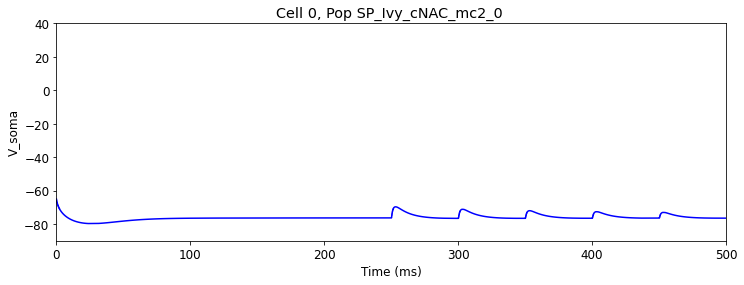

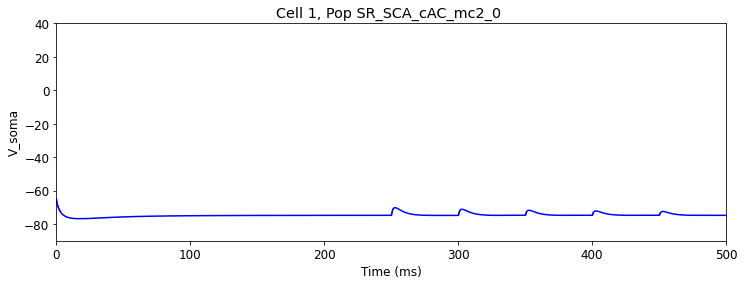

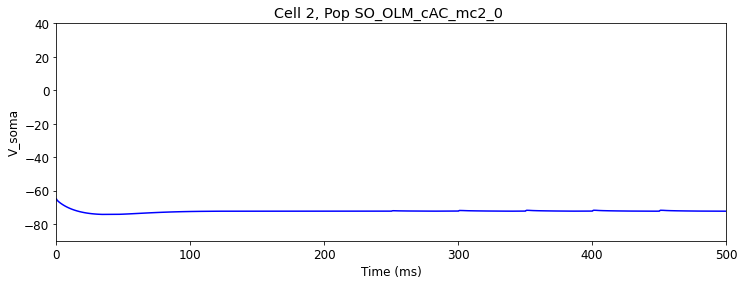

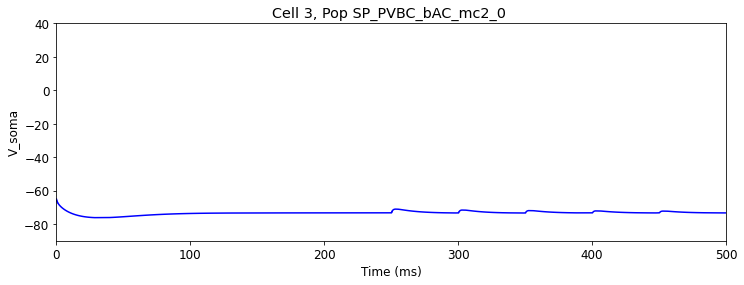

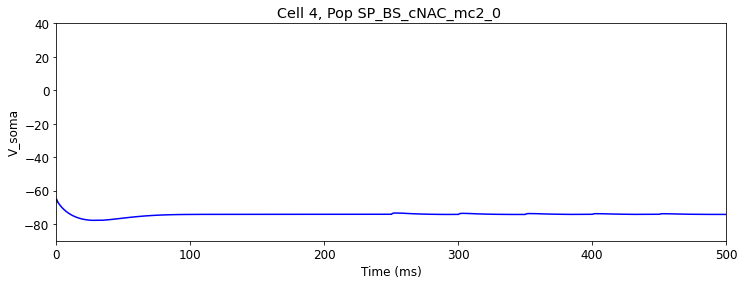

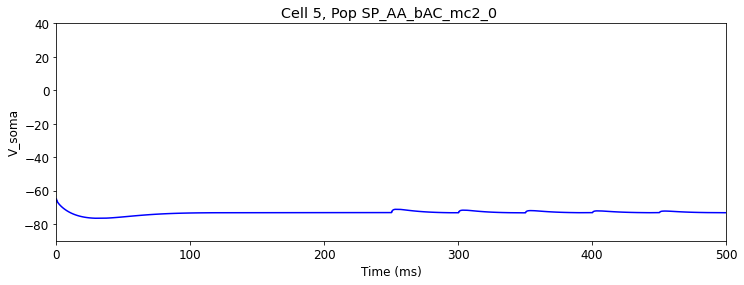

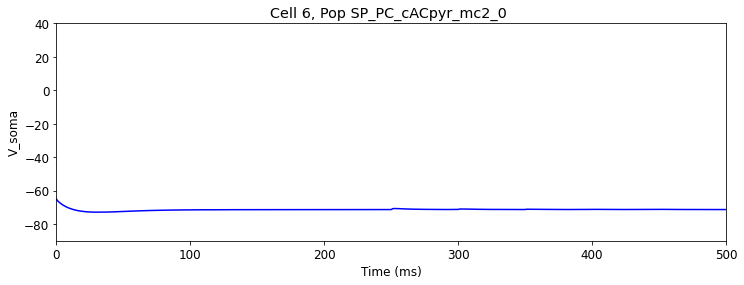

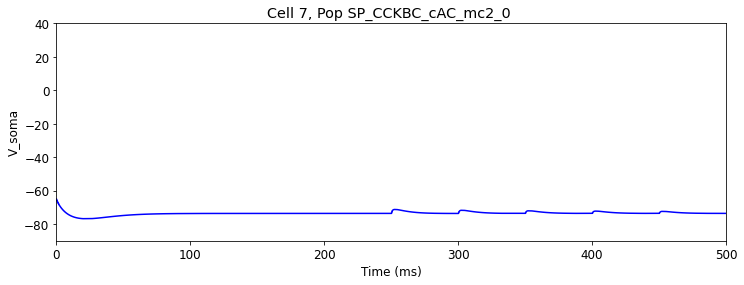

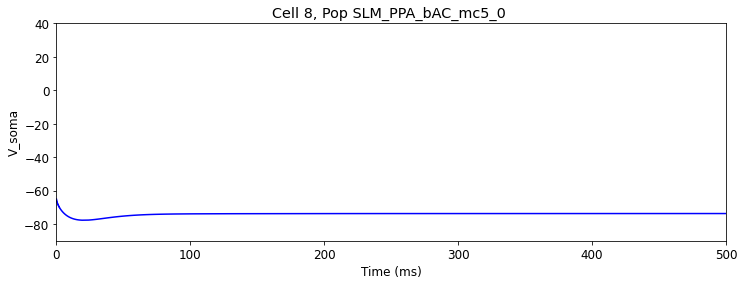

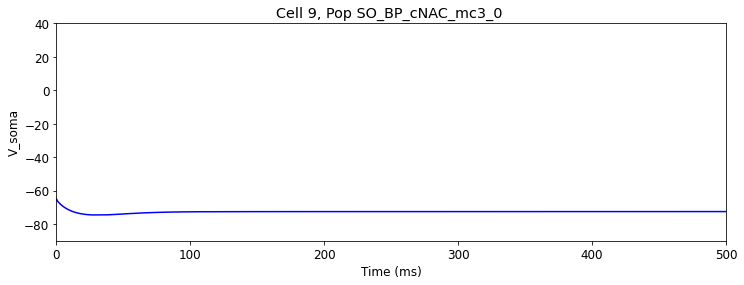

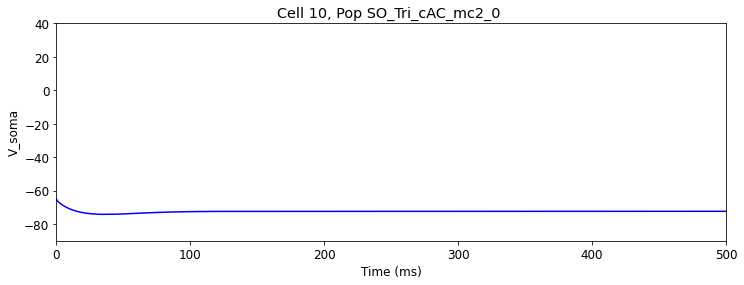

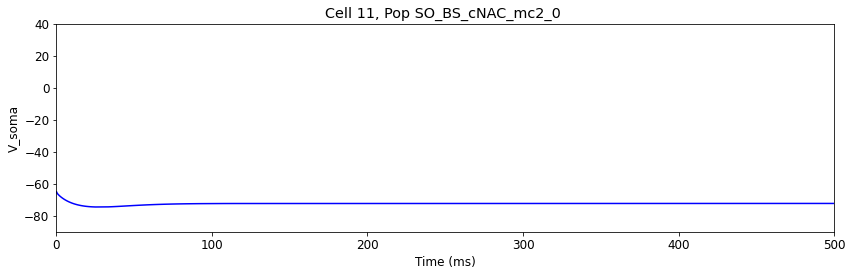

Plotting 3D cell shape ...


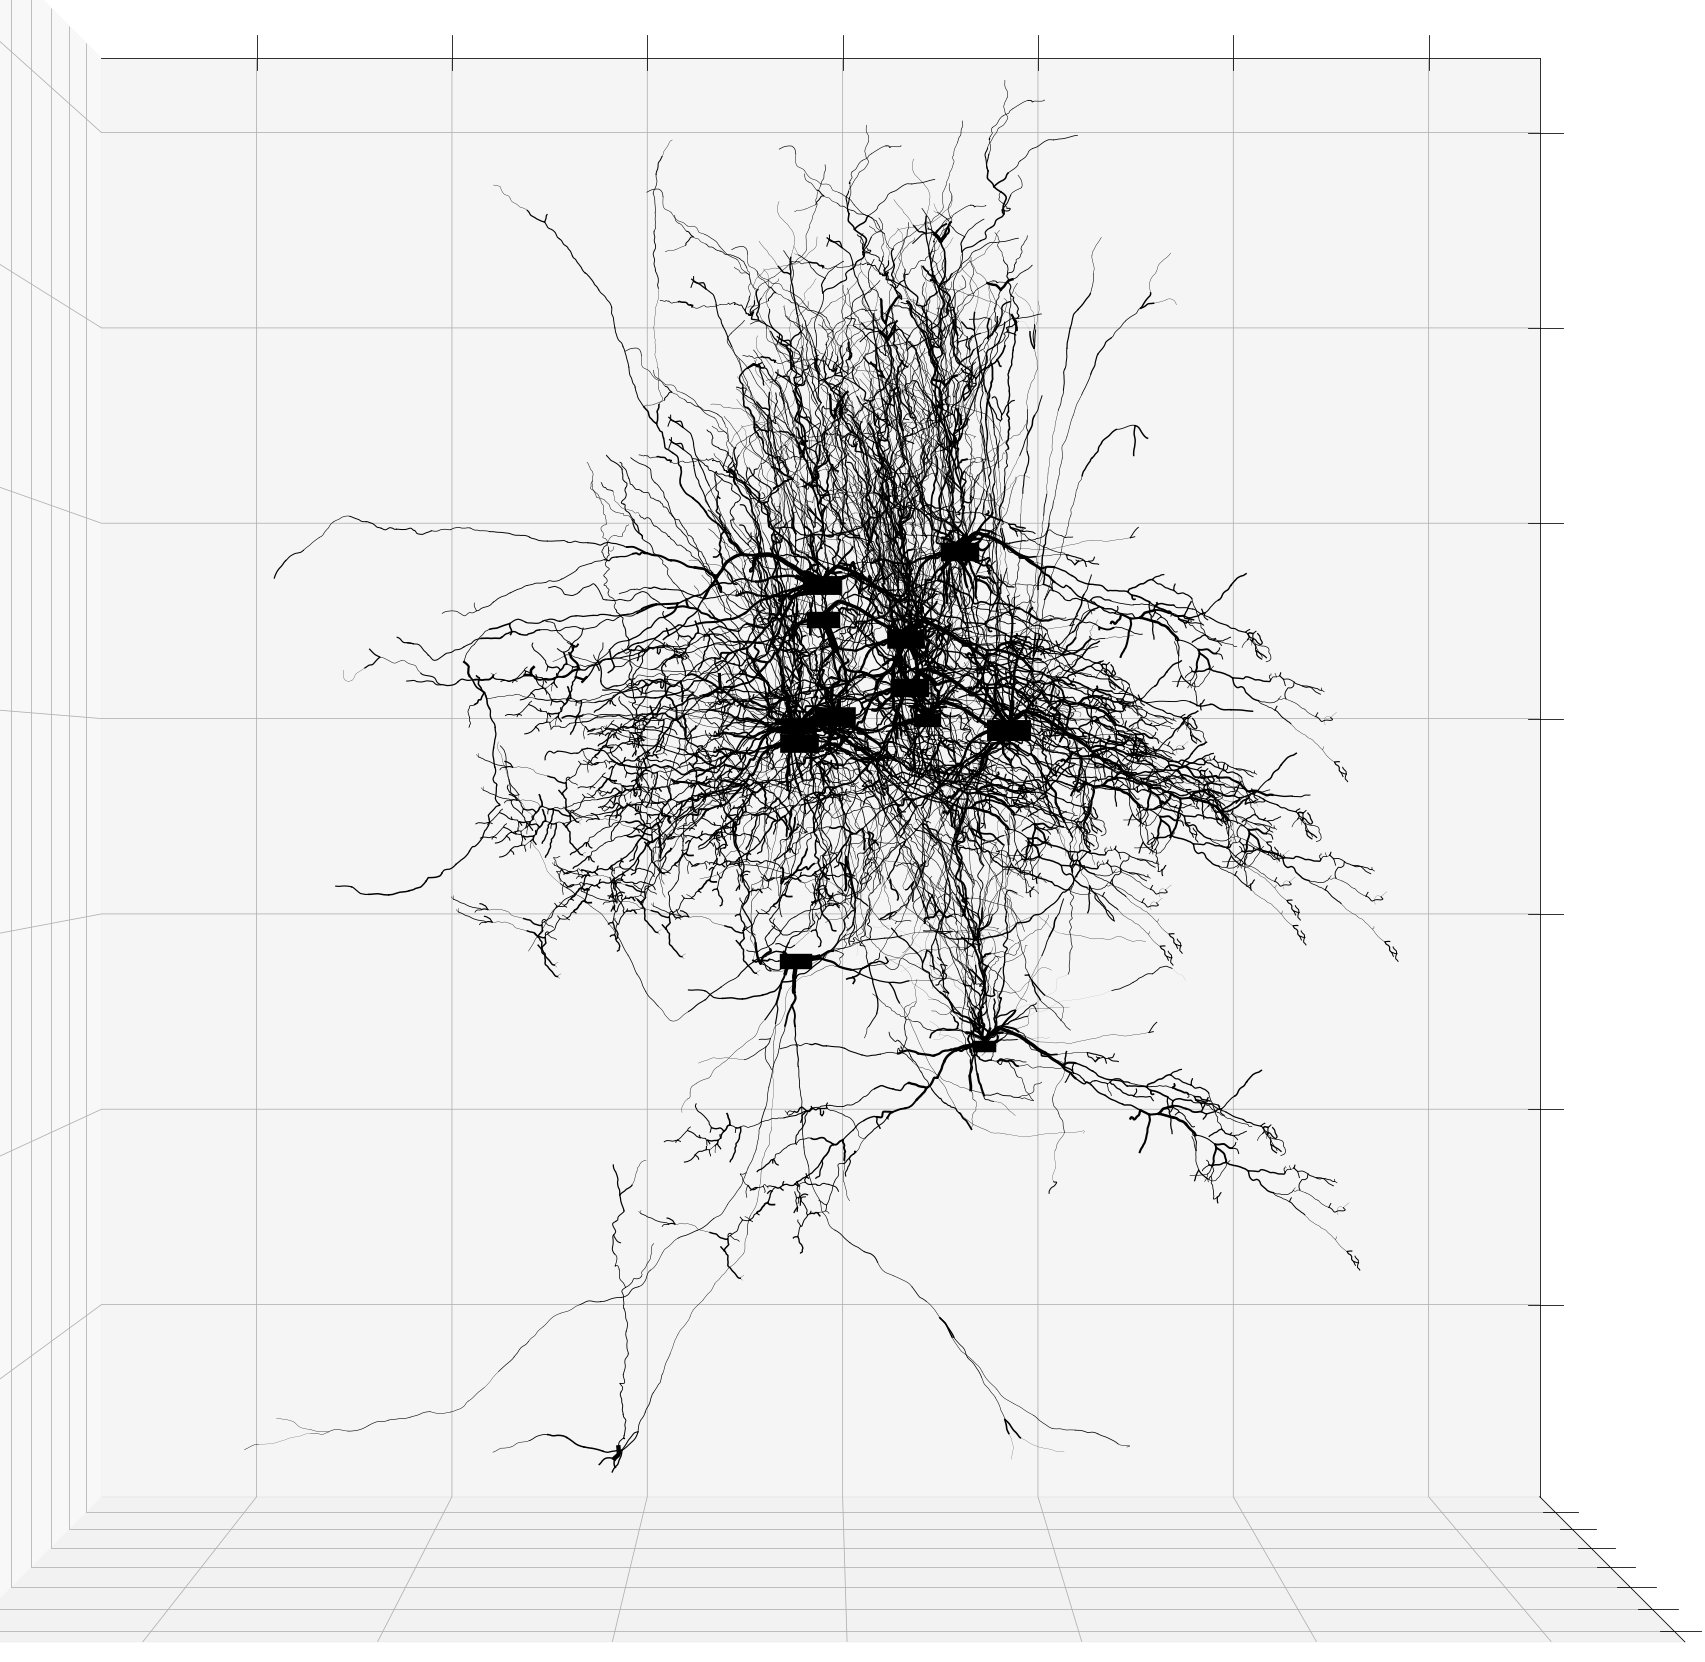

Plotting 2D representation of network cell locations and connections...


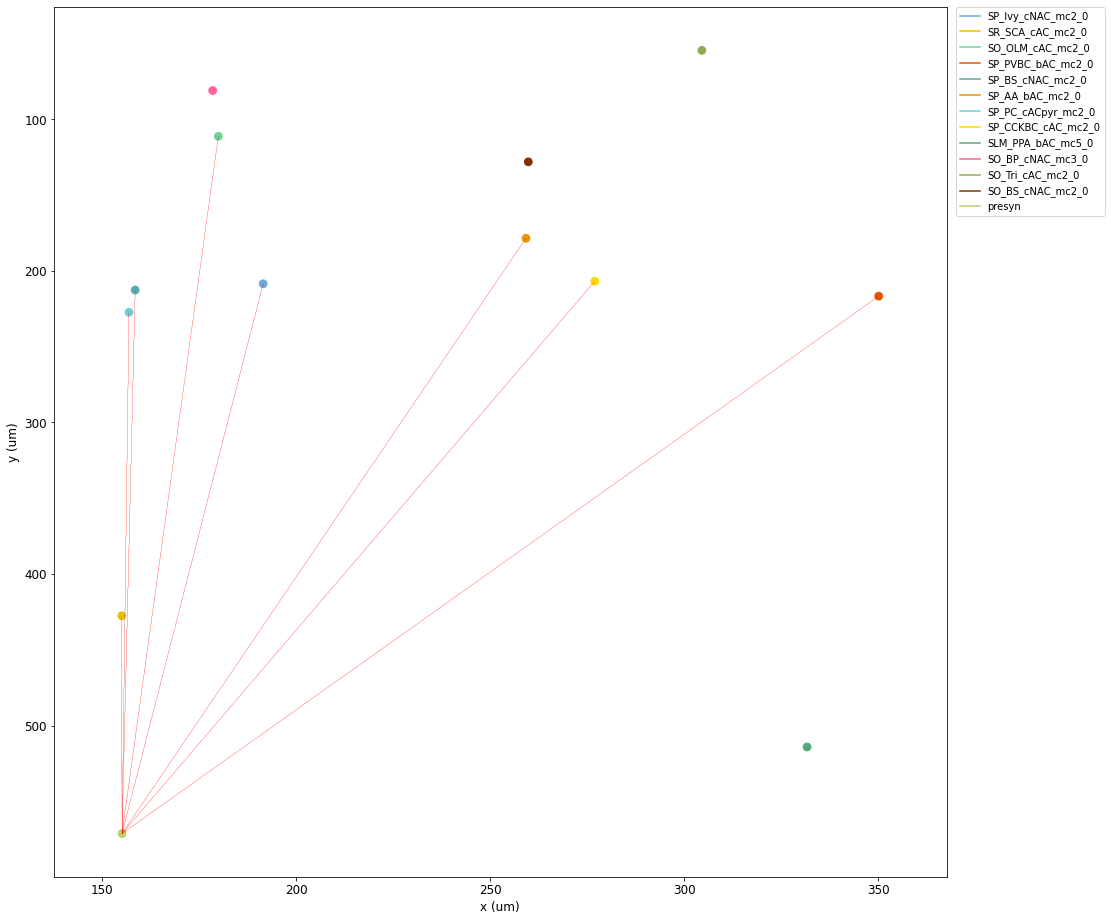

  Done; plotting time = 32.60 s

Total time = 397.56 s

End time:  2021-10-05 17:25:09.182595


In [33]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

Plotting connectivity matrix...


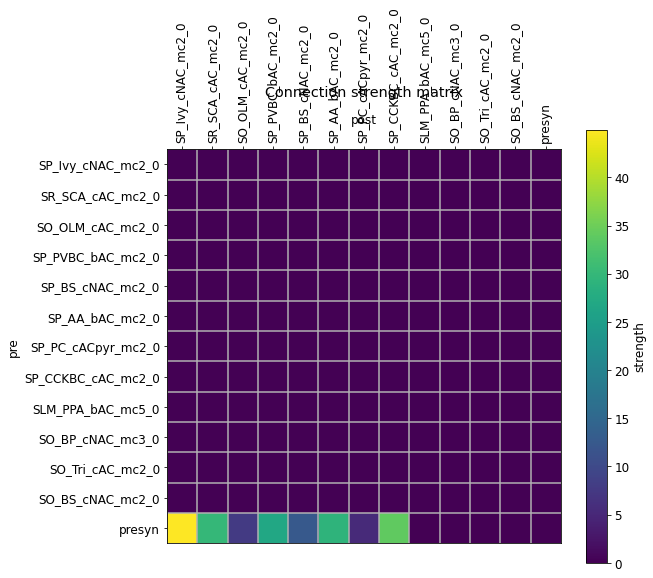

In [34]:
sim.analysis.plotConn(graphType='matrix', saveFig=True);